<a href="https://colab.research.google.com/github/karaogluhh/Computer-Vision-Notes/blob/main/04_OpenCV_Image_Statistics_Normalization_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

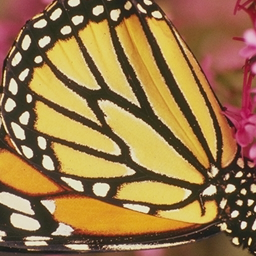

In [13]:
img = cv2.imread("butterfly.png")
cv2_imshow(img)

## Minimum and Maximum Points and Locations

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale for min/max value calculation.
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray_img)

In [15]:
print(f"Minimum value: {minVal} at {minLoc}")

Minimum value: 20.0 at (255, 250)


In [16]:
print(f"Maximum value {maxVal} at {maxLoc}")

Maximum value 245.0 at (41, 201)


Another way to achieve the same result is by reading the image directly in grayscale using `cv2.imread("butterfly.png", cv2.IMREAD_GRAYSCALE)`. This approach eliminates the need for the `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` operation.

In [17]:
img = cv2.imread("butterfly.png", cv2.IMREAD_GRAYSCALE)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(img)

print(f"Minimum value: {minVal} at {minLoc}")
print(f"Maximum value {maxVal} at {maxLoc}")

Minimum value: 21.0 at (7, 57)
Maximum value 245.0 at (41, 201)


You might notice a slight difference in the results for the minimum value (`minVal`) and its location (`minLoc`) when comparing the two methods:

1.  Reading the image in color and then converting to grayscale using `cv2.cvtColor`.
2.  Reading the image directly in grayscale using `cv2.imread` with `cv2.IMREAD_GRAYSCALE`.

This difference occurs because `cv2.cvtColor` uses a weighted average of the color channels based on luminance, while `cv2.imread` with `IMREAD_GRAYSCALE` might employ a different method during the initial loading process.

However, the maximum values and their locations are the same in this example. The slight variations in minimum values and locations are generally small and acceptable for most image processing applications.

## Mean and Standard Deviation

In [20]:
mean, std = cv2.meanStdDev(img)

In [21]:
print(f"Mean and standard deviation: {mean}, {std}")

Mean and standard deviation: [[128.00442505]], [[64.09846489]]


In [23]:
img[np.where(img < mean)] = 0
img[np.where(img > mean)] = 255

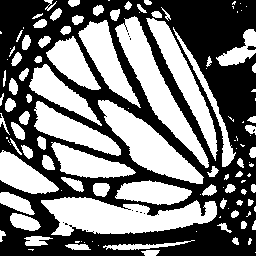

In [24]:
cv2_imshow(img)

## Image Thresholding

The `cv2.threshold()` function is used to convert a grayscale image into a binary image. It works by comparing each pixel's intensity value with a specified threshold.

The parameters of the `cv2.threshold()` function are:

*   **Input Image**: The source grayscale image.
*   **Threshold Value**: The value used for comparison.
*   **Maximum Value**: The value assigned to pixels that satisfy the threshold condition.
*   **Thresholding Type**: Specifies the type of thresholding to be applied.

The code in the cell below demonstrates different thresholding types by iterating through values from 0 to 4, which correspond to the following types:

*   `0` (`cv2.THRESH_BINARY`): Pixels greater than the threshold are set to the maximum value (255), otherwise to 0.
*   `1` (`cv2.THRESH_BINARY_INV`): Pixels greater than the threshold are set to 0, otherwise to the maximum value (255).
*   `2` (`cv2.THRESH_TRUNC`): Pixels greater than the threshold are set to the threshold value, otherwise they remain unchanged.
*   `3` (`cv2.THRESH_TOZERO`): Pixels greater than the threshold remain unchanged, otherwise they are set to 0.
*   `4` (`cv2.THRESH_TOZERO_INV`): Pixels greater than the threshold are set to 0, otherwise they remain unchanged.

The loop applies each type of thresholding with a `threshold_val` of 100 and displays the resulting binary image.

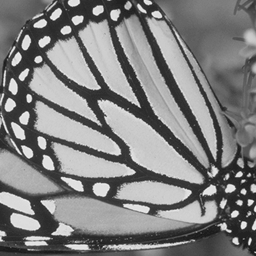

-1

In [25]:
img = cv2.imread("butterfly.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
cv2.waitKey(1)

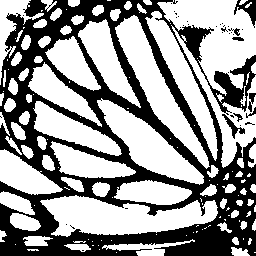

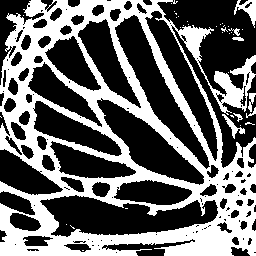

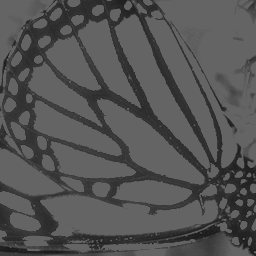

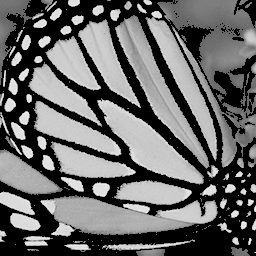

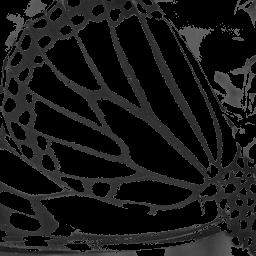

In [28]:
threshold_val = 100

for i in range(5):
    ret, binary = cv2.threshold(img, threshold_val, 255, i)
    cv2_imshow(binary)
    cv2.waitKey(1)

## Image Normalization


## Image Normalization

Image normalization is a process used to adjust the range of pixel intensity values in an image. The goal is often to bring the image into a specific range of values, making it easier to compare images or prepare them for further processing.

One common way to normalize an image is by using the `cv2.normalize()` function.

The `cv2.normalize()` function has several parameters, but the most important ones are:

*   **Input Array**: The source image (NumPy array).
*   **Output Array**: The destination image (NumPy array of the same size as the input array).
*   **Alpha**: The lower bound of the range for normalization (used with `cv2.NORM_MINMAX`).
*   **Beta**: The upper bound of the range for normalization (used with `cv2.NORM_MINMAX`).
*   **Norm Type**: The type of normalization to be applied. Common types include:
    *   `cv2.NORM_MINMAX`: Normalizes the image so that the minimum value becomes `alpha` and the maximum value becomes `beta`.
    *   `cv2.NORM_INF`: Normalizes the image by dividing each pixel value by the maximum absolute value in the array.
    *   `cv2.NORM_L1`: Normalizes the image by dividing each pixel value by the sum of absolute values in the array.
    *   `cv2.NORM_L2`: Normalizes the image by dividing each pixel value by the square root of the sum of squared values in the array.
*   **Dtype**: The desired depth of the output array (e.g., `cv2.CV_8U` for 8-bit unsigned integers).
*   **Mask**: An optional operation mask.

A common use case for `cv2.normalize()` is to normalize pixel values to the range \[0, 255] for display or 8-bit image processing.

Here's an example of how to normalize an image to the range \[0, 255] using `cv2.NORM_MINMAX`: